## Assessment Task 5 (35 marks)

In this assignment, you will use a lot of concepts learnt in this course to come up with a good solution for a given chronic kidney disease prediction problem.

## Submission Instruction
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum ten sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A5_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
orginal_data=pd.read_csv('chronic_kidney_disease.csv')
data=orginal_data.copy()

In [5]:
import pandas as pd
orginal_data=pd.read_csv('chronic_kidney_disease.csv')
data=orginal_data.copy()
data.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [2]:
#Getting an overiew of the data
data.head(50)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,...,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,?,...,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,...,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,...,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,...,35,7300,4.6,1,1,1,1,1,1,ckd
5,60,90,1.015,3,0,0,0,1,1,74,...,39,7800,4.4,0,0,1,1,0,1,ckd
6,68,70,1.01,0,0,0,0,1,1,100,...,36,0,0.0,1,1,1,1,1,1,ckd
7,24,?,1.015,2,4,0,1,1,1,410,...,44,6900,5.0,1,0,1,1,0,1,ckd
8,52,100,1.015,3,0,0,1,0,1,138,...,33,9600,4.0,0,0,1,1,1,0,ckd
9,53,90,1.02,2,0,1,1,0,1,70,...,29,12100,3.7,0,0,1,0,1,0,ckd


In [3]:
#We can see there are a lot of missing values with '?' sign
#First checking if there are any null values
data.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [4]:
data.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [81]:
#We can see there are no NA values in the dataset
#Now we will check how many columns have missig values with '?' signs, for that we first covert missing values with NAN 
#and then count them
data.replace({"?":np.nan},inplace=True)
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()
#Below are the columns with sum of missing values

age      9
bp      12
sg      47
al      46
su      49
bgr     44
bu      19
sc      17
sod     87
pot     88
hemo    52
dtype: int64

In [4]:
#Checking index of missing values
col_1=data[data['age'].isnull()].index.tolist()
col_2=data[data['bp'].isnull()].index.tolist()
col_3=data[data['sg'].isnull()].index.tolist()
col_4=data[data['al'].isnull()].index.tolist()
col_5=data[data['su'].isnull()].index.tolist()
col_6=data[data['bgr'].isnull()].index.tolist()
col_7=data[data['bu'].isnull()].index.tolist()
col_8=data[data['sc'].isnull()].index.tolist()
col_9=data[data['sod'].isnull()].index.tolist()
col_10=data[data['pot'].isnull()].index.tolist()
col_11=data[data['hemo'].isnull()].index.tolist()

In [82]:
data.drop('sod',inplace=True,axis=1)
data.drop('pot',inplace=True,axis=1)

In [83]:
#Filling missing value with a value before missing value
data["age"].fillna(method="bfill",inplace=True)
data["bp"].fillna(method="bfill",inplace=True)
data["sg"].fillna(method="bfill",inplace=True)
data["al"].fillna(method="bfill",inplace=True)
data["su"].fillna(method="bfill",inplace=True)
data["bgr"].fillna(method="bfill",inplace=True)
data["bu"].fillna(method="bfill",inplace=True)
data["sc"].fillna(method="bfill",inplace=True)
#data["sod"].fillna(method="bfill",inplace=True)
#data["pot"].fillna(method="bfill",inplace=True)
data["hemo"].fillna(method="bfill",inplace=True)


In [84]:
data.dtypes

age       object
bp        object
sg        object
al        object
su        object
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr       object
bu        object
sc        object
hemo      object
pcv        int64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class     object
dtype: object

In [85]:
#We can see that a lot of columns are set as objects which means string, so we need to convert them into appropriate datatype
data_1 =pd.DataFrame(data.iloc[:,:-1].astype(float))
data_2=pd.DataFrame(data.iloc[:,-1])
data=pd.concat([data_1,data_2],axis=1,sort=False)
data.dtypes


age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class     object
dtype: object

In [86]:
#checking for outliers
#Ploting inter quantile range
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


age        23.00
bp         10.00
sg          0.01
al          2.00
su          0.00
rbc         0.00
pc          0.00
pcc         0.00
ba          0.00
bgr        64.50
bu         39.00
sc          1.90
hemo        4.40
pcv        18.00
wbcc     9400.00
rbcc        5.10
htn         1.00
dm          1.00
cad         0.00
appet       0.00
pe          0.00
ane         0.00
dtype: float64


In [87]:
#Counting total number of outliers in each column
outlier=pd.DataFrame(data_1< (Q1 - 1.5 * IQR)) |(data_1 > (Q3 + 1.5 * IQR))
#rows=outlier.isin([True])
#rows
cols=outlier.isin([True]).sum(axis=0)
cols
#sum(rows!=0)
#print(data['age']< (Q1.age - 1.5 * IQR.age)) |(data['age'] > (Q3.age + 1.5 * IQR.age))

age       7
bp       39
sg        0
al        0
su       77
rbc      47
pc       76
pcc      46
ba       26
bgr      36
bu       41
sc       53
hemo      1
pcv       0
wbcc      1
rbcc      0
htn       0
dm        0
cad      38
appet    83
pe       77
ane      61
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024EEBD6EFD0>]],
      dtype=object)

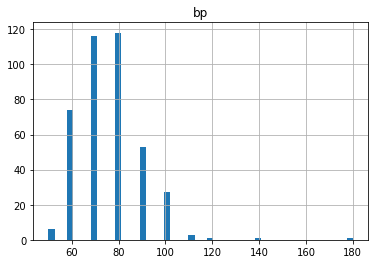

In [88]:
data.hist(column=["bp"], bins=50) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024EEC70FBA8>,
      dtype=object)

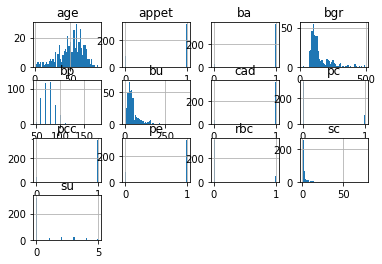

In [89]:
#fig, axes = plt.subplots(2, 2)
#data['age'].hist(bins=70, ax=axes[0])
#data['bp'].hist(bins=70, ax=axes[1])
#data['su'].hist(bins=70, ax=axes[2])
#data['rbc'].hist(bins=70, ax=axes[3])
#dflux.hist('rate', bins=100, ax=axes[0])
#dflux2.hist('rate', bins=100, ax=axes[1])
#hist = data['age'].hist(bins=30,grid=False)
data.hist(column=["age", "bp","su","rbc","pc","pcc","ba","bgr","bu","sc","cad","appet","pe"], bins=50) 

In [91]:
data_best_feature=orginal_data.copy()

In [92]:
X_best,Y_best=data.iloc[:,:-1],data.iloc[:,-1]
print(X_best.shape)
print(Y_best.shape)

(400, 22)
(400,)


In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi_sq = SelectKBest(chi2, k=22)
fit_chi = chi_sq.fit(X_best,Y_best)
score_chi=fit_chi.scores_
score_chi_pd=pd.DataFrame(score_chi,columns=['Score'])
Lables_chi=pd.DataFrame(X_best.columns,columns=["Feature list"])
Combo_chi=pd.concat([Lables_chi,score_chi_pd],axis=1)
print("Three Best Feature list by Chi-Square: ")
print(Combo_chi.nlargest(22,'Score'))


Three Best Feature list by Chi-Square: 
   Feature list         Score
14         wbcc  52947.074533
9           bgr   2621.658845
10           bu   2472.319851
13          pcv   1291.222184
11           sc    376.667517
15         rbcc    291.906188
3            al    257.400000
12         hemo    148.663487
0           age    126.139020
4            su    118.800000
1            bp     81.226806
16          htn     49.338911
6            pc     45.600000
17           dm     43.436693
5           rbc     28.200000
19        appet     12.214721
20           pe     10.263983
21          ane      6.022616
7           pcc      2.116008
18          cad      1.768692
8            ba      0.377184
2            sg      0.006607


In [94]:
#According to CHI-sq below 11 features have the best score so we will built our model on these features
feature_cols=['wbcc','bgr','bu','pcv','sc','rbcc','al','hemo','age','su','bp']

##The dataset

**Dataset file name:** chronic_kidney_disease.csv

**Attribute Information:** 

There are 24 features + class = 25 attributes
1.  Age(numerical): age in years
2.Blood Pressure(numerical): bp in mm/Hg
3.Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin(nominal): al - (0,1,2,3,4,5)
5.Sugar(nominal): su - (0,1,2,3,4,5)
6.Red Blood Cells(nominal): rbc - (normal,abnormal)
7.Pus Cell (nominal): pc - (normal,abnormal)
8.Pus Cell clumps(nominal): pcc - (present,notpresent)
9.Bacteria(nominal): ba - (present,notpresent)
10.Blood Glucose Random(numerical): bgr in mgs/dl
11.Blood Urea(numerical): bu in mgs/dl
12.Serum Creatinine(numerical): sc in mgs/dl
13.Sodium(numerical): sod in mEq/L
14.Potassium(numerical): pot in mEq/L
15.Hemoglobin(numerical): hemo in gms
16.Packed Cell Volume(numerical)
17.White Blood Cell Count(numerical): wc in cells/cumm
18.Red Blood Cell Count(numerical): rc in millions/cmm
19.Hypertension(nominal): htn - (yes,no)
20.Diabetes Mellitus(nominal): dm - (yes,no)
21.Coronary Artery Disease(nominal): cad - (yes,no)
22.Appetite(nominal): appet - (good,poor)
23.Pedal Edema(nominal): pe - (yes,no)
24.Anemia(nominal): ane - (yes,no)
25.Class (nominal): class - (ckd, notckd)


## Part 1: Short questions: **(6 marks)**




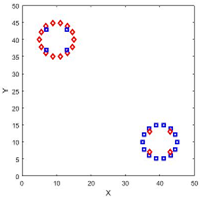


1.  For the above figure, what value of k in KNN method will give the best accuracy for leave-one-out cross-validation. Report accuracy and k value. **(3 marks)**

2.  In classification, overfitting and underfitting is a big problem. Does it happen in Random Forest or not? Why? **(3 marks)**

Overfitting and underfitting can happen in RF as with other classifiers. RF is an ensamble of DT which can easily overfit due to high data variation. If only 1 tree is used in RF, it will overfit the data as is the same as the single DT. Deeper tree has more splits and captures more information about the data. On the other hand if we constrain our model to consider more samples at each node. Less number of samples on each node will lead to underfit.

## Part 2: **(24 marks = 4 methods x 6)**

Using the following four supervised machine learning methods, answer questions(A-D).
1.   Support vector machine
2.   K-Nearest Neighbour
3.   Decision tree, and
4.   Random forest

**A.**  Build optimised classification model to predict the chronic kidney disease from the dataset. **(1 marks)**

**B.** For each optimised model, answer the followings -  **(3 marks)**

*  which hyperparameters were optimised? [Hint: For SVM, kernel can be considered as one of the hyperparameters.]

*  what set or range of values were used for each hyperparameter?

*  which metric was used to measure the performance?

*  justify your design decisions.

**C.**  Plot the prediction performance against hyperparameter values to visualise the optimisation process and mark the optimal value. **(1 marks)**

**D.** Evaluate the model (obtained from A) performance on the test set. Report the confusion matrix, F1-score and accuracy. **(1 marks)**

In [95]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
data_model=data.copy()
data_cv=data.copy()

In [96]:
#Spliting data into train-test using 70-30 ratio
X = pd.DataFrame(data_model[feature_cols])
Y=pd.DataFrame(data_model.iloc[:,-1])
data_model_1=pd.concat([X,Y],axis=1)

train_set,test_set = train_test_split(data_model_1, test_size=0.3,random_state=1)
print(train_set.shape)
print(test_set.shape)

(280, 12)
(120, 12)


In [97]:
#Assigning the data train and test values

x_feature_train,y_predict_train=train_set.iloc[:,:-1],train_set.iloc[:,-1]
x_feature_test,y_predict_test=test_set.iloc[:,:-1],test_set.iloc[:,-1]
print(x_feature_train.shape)
print(y_predict_train.shape)
print(x_feature_test.shape)
print(y_predict_test.shape)
#x_feature,y_class=data_model.iloc[:,:-1],data_model.iloc[:,-1]


(280, 11)
(280,)
(120, 11)
(120,)


In [98]:
#As we have data with multiple scales, we need to convert them into same scale. Here I'm using MinMax scaling
le = preprocessing.LabelEncoder()
mms = MinMaxScaler()

y_predict_train=le.fit_transform(y_predict_train)
y_predict_test=le.fit_transform(y_predict_test)

#y_predict_test
#x_feature_train=mms.fit(x_feature_train)
#x_feature_train=mms.fit(x_feature_test)

mms.fit(x_feature_train)
mms.fit(x_feature_test)
data_trans_train = mms.transform(x_feature_train)
data_trans_test = mms.transform(x_feature_test)

In [99]:
#KNN Model
#We first apply a default k value to check the accuracy with k=50, as we have 400 data points.
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(data_trans_train, y_predict_train)
#y_pred = knn.predict(data_trans_test)
knn_acc_train=metrics.accuracy_score(y_predict_train, knn.predict(data_trans_train))
print("KNN Training Accuracy:{}".format(knn_acc_train))

knn_acc_test=metrics.accuracy_score(y_predict_test, knn.predict(data_trans_test))
print("KNN Test Accuracy:{}".format(knn_acc_test))


#print("Train Accuracy:",metrics.accuracy_score(y_predict_train, y_pred))
#print("Test Accuracy:",metrics.accuracy_score(y_predict_test, y_pred))

KNN Training Accuracy:0.9321428571428572
KNN Test Accuracy:0.9333333333333333


In [100]:
#Hyper parameter tuning for KNN
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': [1,5,15,20,50,100],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(data_trans_train, y_predict_train)
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)
print(knn_gscv.best_estimator_)

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.9571428571428572
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [101]:
#KNN Model with k=5,weights=uniform,metric=euc,leaf_size=30

knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='euclidean',leaf_size=30,p=2)
knn.fit(data_trans_train, y_predict_train)
#y_pred = knn.predict(data_trans_test)
knn_acc_train=metrics.accuracy_score(y_predict_train, knn.predict(data_trans_train))
print("KNN Training Accuracy:{}".format(knn_acc_train))

knn_acc_test=metrics.accuracy_score(y_predict_test, knn.predict(data_trans_test))
print("KNN Test Accuracy:{}".format(knn_acc_test))


#print("Train Accuracy:",metrics.accuracy_score(y_predict_train, y_pred))
#print("Test Accuracy:",metrics.accuracy_score(y_predict_test, y_pred))

KNN Training Accuracy:0.9642857142857143
KNN Test Accuracy:0.9416666666666667


(49, 10)
(49, 10)


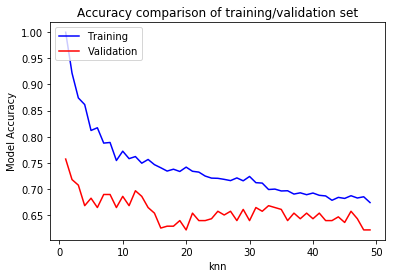

In [102]:
#Ploting validation curve for knn using n_neighbors.
from sklearn.model_selection import validation_curve

knn_range=list(range(1,50))
train_scores, valid_scores = validation_curve( knn, x_feature_train, y_predict_train, param_name="n_neighbors",param_range=knn_range,cv=10, scoring="accuracy",n_jobs=-1)
print(train_scores.shape)
print(valid_scores.shape)

mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)

plt.plot(knn_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(knn_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("knn")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()

(5, 10)
(5, 10)


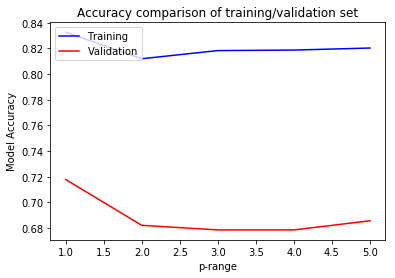

In [103]:
#Ploting validation curve for knn using p-value.

p_range=[1,2,3,4,5]
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), x_feature_train, y_predict_train, param_name="p",param_range=p_range,cv=10, scoring="accuracy")
print(train_scores.shape)
print(valid_scores.shape)

mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)

plt.plot(p_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(p_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("p-range")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()

              precision    recall  f1-score   support

           0       0.98      0.91      0.95        70
           1       0.89      0.98      0.93        50

   micro avg       0.94      0.94      0.94       120
   macro avg       0.94      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120

Confusion Matrix: 
[[64  6]
 [ 1 49]]


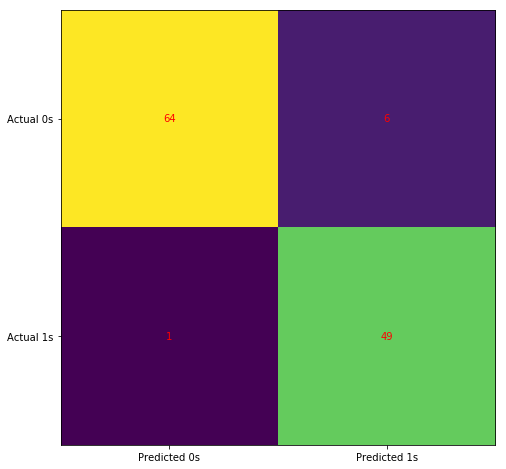

In [104]:
#Confusion matrix, f1-score
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_predict_test, knn.predict(data_trans_test)))
#Confusion Matrix
Confusion_matrix = confusion_matrix(y_predict_test, knn.predict(data_trans_test))
print("Confusion Matrix: ")
print(Confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(Confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, Confusion_matrix[i, j], ha='center', va='center', color='red')
plt.show()

In [105]:
#SVM
#running SVM on default setting
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
svm_model=svm.SVC(kernel='linear')
svm_model.fit(data_trans_train,y_predict_train)
svm_acc_train=metrics.accuracy_score(y_predict_train,svm_model.predict(data_trans_train))
svm_acc_test=metrics.accuracy_score(y_predict_test,svm_model.predict(data_trans_test))
print("SVM Training Accuracy:{}".format(svm_acc_train))
print("SVM Testing Accuracy:{}".format(svm_acc_test))

SVM Training Accuracy:0.9642857142857143
SVM Testing Accuracy:0.9666666666666667


In [106]:
#Hyper parameter tuning for SVM
SVM2 = svm.SVC()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['linear','rbf','poly','sigmoid']}
#use gridsearch to test all values for n_neighbors
svm_gscv = GridSearchCV(SVM2, param_grid, cv=5)
#fit model to data
svm_gscv.fit(data_trans_train, y_predict_train)
print(svm_gscv.best_params_)
print(svm_gscv.best_score_)
print(svm_gscv.best_estimator_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}
0.975
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [107]:
#SVM with recommended hyper parameters
svm_model=svm.SVC(kernel='linear',C=10,gamma=1)
svm_model.fit(data_trans_train,y_predict_train)
svm_acc_train=metrics.accuracy_score(y_predict_train,svm_model.predict(data_trans_train))
svm_acc_test=metrics.accuracy_score(y_predict_test,svm_model.predict(data_trans_test))
print("SVM Training Accuracy:{}".format(svm_acc_train))
print("SVM Testing Accuracy:{}".format(svm_acc_test))

SVM Training Accuracy:0.9857142857142858
SVM Testing Accuracy:0.9666666666666667


(4, 3)
(4, 3)


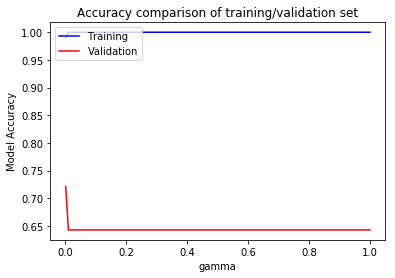

In [32]:
#Ploting validation curve for gamma.

gamma_range=[1, 0.1, 0.01, 0.001]
train_scores, valid_scores = validation_curve(SVC(), x_feature_train, y_predict_train, param_name="gamma",param_range=gamma_range,cv=3, scoring="accuracy",n_jobs=-1)
print(train_scores.shape)
print(valid_scores.shape)

mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)

plt.plot(gamma_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(gamma_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("gamma")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()

(4, 3)
(4, 3)


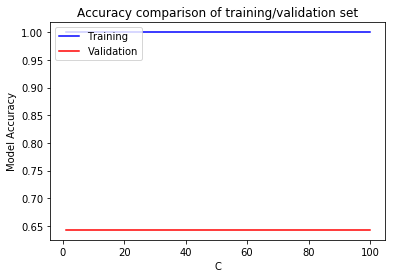

In [36]:
#Ploting validation curve for C.
C_range=[1,5,10,100]
train_scores, valid_scores = validation_curve(SVC(), x_feature_train, y_predict_train, param_name="C",param_range=C_range,cv=3, scoring="accuracy")
print(train_scores.shape)
print(valid_scores.shape)

mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)

plt.plot(C_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(C_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("C")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.94      0.98      0.96        50

   micro avg       0.97      0.97      0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

Confusion Matrix: 
[[67  3]
 [ 1 49]]


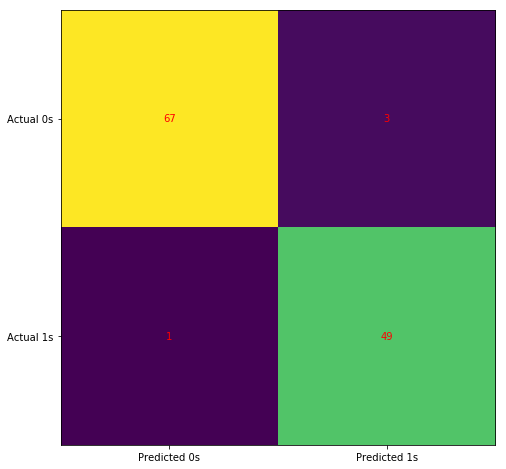

In [108]:
#Confusion matrix, Accuracy
print(classification_report(y_predict_test, svm_model.predict(data_trans_test)))
#Confusion Matrix
Confusion_matrix = confusion_matrix(y_predict_test, svm_model.predict(data_trans_test))
print("Confusion Matrix: ")
print(Confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(Confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, Confusion_matrix[i, j], ha='center', va='center', color='red')
plt.show()

In [109]:
#Decision Tree with recommended hyper parameters
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
treeclf=DecisionTreeClassifier(max_depth=1,random_state=1)
treeclf.fit(x_feature_train,y_predict_train)
print("Decision Tree Training Accuracy:{}".format(metrics.accuracy_score(y_predict_train, treeclf.predict(x_feature_train))))
print("Decision Tree Testing Accuracy:{}".format(metrics.accuracy_score(y_predict_test, treeclf.predict(x_feature_test))))

Decision Tree Training Accuracy:0.9285714285714286
Decision Tree Testing Accuracy:0.9


In [110]:
#Hyper parameter tuning for Decesion Tree
treeclf_2 = DecisionTreeClassifier()
#create a dictionary of all values we want to test for n_neighbors

# hyperparameters = {'max_leaf_nodes': list(range(2, 50)),'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15]}

param_grid = {'criterion':['gini','entropy'],'max_depth':list(range(1,16)),'max_leaf_nodes': list(range(2,100))}
#use gridsearch to test all values for n_neighbors
DT_gscv = GridSearchCV(treeclf_2, param_grid, cv=5)
#fit model to data
DT_gscv.fit(data_trans_train, y_predict_train)
print(DT_gscv.best_params_)
print(DT_gscv.best_score_)
print(DT_gscv.best_estimator_)

{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 5}
0.9892857142857143
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [111]:
#After Applying different combinations, below are the best hyperparameter value set for highest accuracy
treeclf=DecisionTreeClassifier(criterion='entropy',max_depth=3,max_leaf_nodes=5,random_state=1)
treeclf.fit(x_feature_train,y_predict_train)
print("Decision Tree Training Accuracy:{}".format(metrics.accuracy_score(y_predict_train, treeclf.predict(x_feature_train))))
print("Decision Tree Testing Accuracy:{}".format(metrics.accuracy_score(y_predict_test, treeclf.predict(x_feature_test))))

Decision Tree Training Accuracy:1.0
Decision Tree Testing Accuracy:0.9666666666666667


(10, 10)
(10, 10)


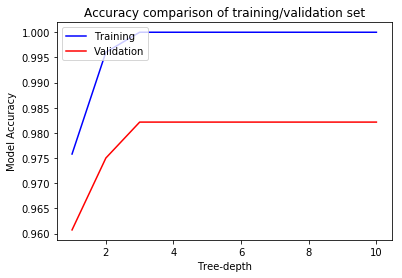

In [57]:
#Plotting validation curve for 10 fold cv

max_depth_range = range(1, 11)
train_scores, valid_scores = validation_curve( treeclf, x_feature_train, y_predict_train, param_name="max_depth",param_range=max_depth_range,cv=10, scoring="accuracy")
print(train_scores.shape)
print(valid_scores.shape)

mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)

plt.plot(max_depth_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(max_depth_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Tree-depth")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        70
           1       0.93      1.00      0.96        50

   micro avg       0.97      0.97      0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

Confusion Matrix: 
[[66  4]
 [ 0 50]]


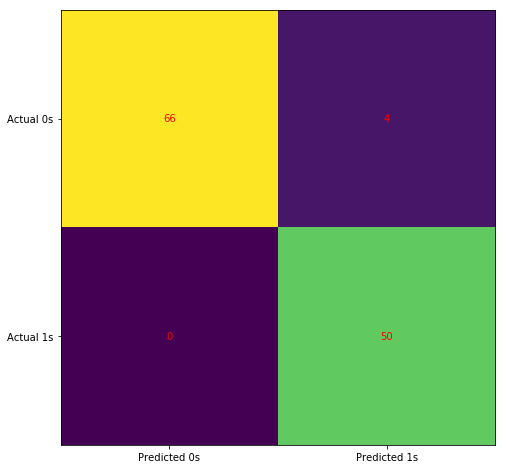

In [112]:
#Confusion matrix, accuracy
print(classification_report(y_predict_test, treeclf.predict(x_feature_test)))
#Confusion Matrix
Confusion_matrix = confusion_matrix(y_predict_test, treeclf.predict(x_feature_test))
print("Confusion Matrix: ")
print(Confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(Confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, Confusion_matrix[i, j], ha='center', va='center', color='red')
plt.show()

In [113]:
#Running Random Forest with default parameters
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=1)
rfclf.fit(x_feature_train,y_predict_train)
print("Training accuracy: {}".format(metrics.accuracy_score(y_predict_train, rfclf.predict(x_feature_train))))
print("Testing accuracy : {}".format(metrics.accuracy_score(y_predict_test, rfclf.predict(x_feature_test))))

Training accuracy: 1.0
Testing accuracy : 0.9833333333333333


In [61]:
#Hyper parameter tuning for Random Forest. This might take a while to execute

rfclf2 = RandomForestClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_estimators':[50,100,200,300],'criterion':['gini','entropy'],'max_depth': list(range(1,10)),'max_features':['auto','sqrt','log2']}
#use gridsearch to test all values
rfclf2_gscv = GridSearchCV(rfclf2, param_grid, cv=5)
#fit model to data
rfclf2_gscv.fit(data_trans_train, y_predict_train)
print(rfclf2_gscv.best_params_)
print(rfclf2_gscv.best_score_)
print(rfclf2_gscv.best_estimator_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}
0.9892857142857143
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [114]:
#After Applying different combinations of hyper parameters, the best results achieved by n_esti=50, max_depth=7, criteria=gini
#max_features=auto

rfclf = RandomForestClassifier(criterion='gini',n_estimators=50, max_depth=7, random_state=42,max_features='auto')
rfclf.fit(x_feature_train,y_predict_train)
print("Training accuracy: {}".format(metrics.accuracy_score(y_predict_train, rfclf.predict(x_feature_train))))
print("Testing accuracy : {}".format(metrics.accuracy_score(y_predict_test, rfclf.predict(x_feature_test))))

Training accuracy: 1.0
Testing accuracy : 0.9916666666666667


In [ ]:
Hyper-parameter used: criterion, n_estimtores,max_depth,max_features
Conclusion: After hyper parameter tuning, test accuracy improved from 0.98 to 0.99.

(10, 10)
(10, 10)


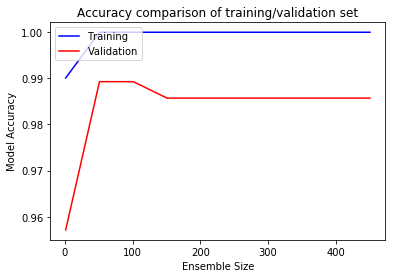

In [65]:
#As this is our finalized model with highest accuracy, all hyper-paramter validation will be plotted
#Plotting validation curve for n_estimators 10 fold cv

ensemble_sizes = range(1, 500, 50)
train_scores, valid_scores = validation_curve( rfclf, x_feature_train, y_predict_train, param_name="n_estimators",param_range=ensemble_sizes,cv=10, scoring="accuracy")
print(train_scores.shape)
print(valid_scores.shape)

mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)

plt.plot(ensemble_sizes, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(ensemble_sizes, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Ensemble Size")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()

(2, 10)
(2, 10)


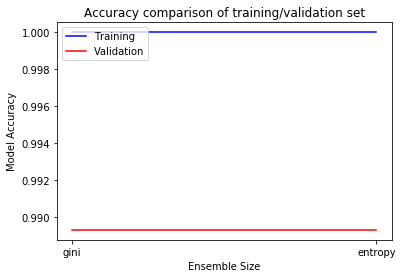

In [67]:
#Plotting validation curve for criteria, 10 fold cv

criteria_range = ['gini','entropy']
train_scores, valid_scores = validation_curve( rfclf, x_feature_train, y_predict_train, param_name="criterion",param_range=criteria_range,cv=10, scoring="accuracy")
print(train_scores.shape)
print(valid_scores.shape)

mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)

plt.plot(criteria_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(criteria_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Ensemble Size")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()

(10, 10)
(10, 10)


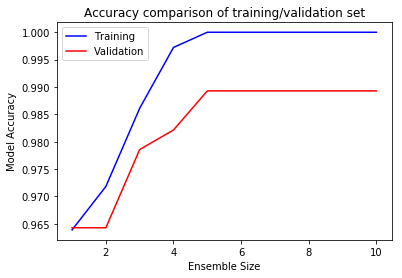

In [76]:
#Plotting validation curve for max_depth, 10 fold cv
depth_range = range(1,11)
train_scores, valid_scores = validation_curve( rfclf, x_feature_train, y_predict_train, param_name="max_depth",param_range=depth_range,cv=10, scoring="accuracy")
print(train_scores.shape)
print(valid_scores.shape)

mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)

plt.plot(depth_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(depth_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Ensemble Size")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()

(3, 10)
(3, 10)


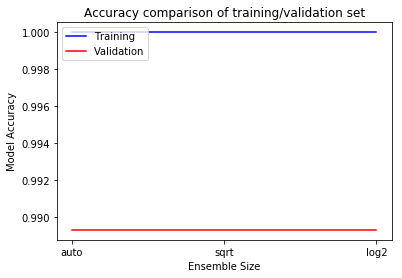

In [69]:
#Plotting validation curve for max_feature, 10 fold cv
maxfeature_range = ['auto','sqrt','log2']
train_scores, valid_scores = validation_curve( rfclf, x_feature_train, y_predict_train, param_name="max_features",param_range=maxfeature_range,cv=10, scoring="accuracy")
print(train_scores.shape)
print(valid_scores.shape)

mean_train_score = np.mean(train_scores, axis=1)
mean_val_score = np.mean(valid_scores, axis=1)

plt.plot(maxfeature_range, mean_train_score, color="blue", linewidth=1.5, label="Training")
plt.plot(maxfeature_range, mean_val_score, color="red", linewidth=1.5, label="Validation")
plt.legend(loc="upper left")
plt.xlabel("Ensemble Size")
plt.ylabel("Model Accuracy")
plt.title("Accuracy comparison of training/validation set")
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        70
           1       0.98      1.00      0.99        50

   micro avg       0.99      0.99      0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Confusion Matrix: 
[[69  1]
 [ 0 50]]


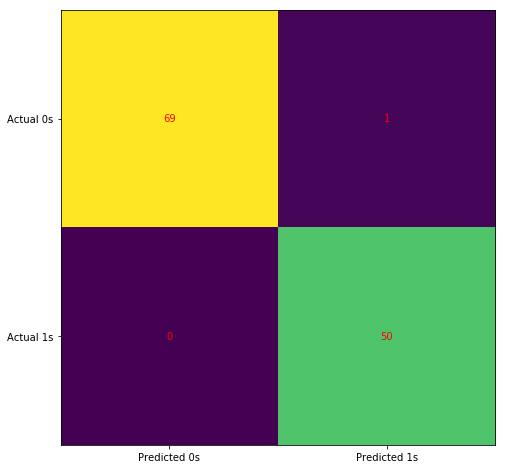

In [52]:
#Confusion matrix, Accuracy
print(classification_report(y_predict_test, rfclf.predict(x_feature_test)))
#Confusion Matrix
Confusion_matrix = confusion_matrix(y_predict_test, rfclf.predict(x_feature_test))
print("Confusion Matrix: ")
print(Confusion_matrix)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(Confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, Confusion_matrix[i, j], ha='center', va='center', color='red')
plt.show()

## Part 3: Discussion **(5 marks)**

Based on the results obtained in Part-2, which classification method showed the best performance and why? Do you have any suggestions to further improve the model performances? **(5 marks)**